In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
import scipy.stats as stats
from datetime import datetime
import random

pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.6f}'.format

path = 'data/'

In [2]:
file_name = 'GSPC_sp500_edit.csv'

In [3]:
df = pd.read_csv(path + file_name, sep='|')
df.shape

(193, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    193 non-null    object
 1   Close   193 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [5]:
df.sample(5)

,Date,Close
103,01/11/2013,"1805,81"
180,01/04/2020,"2912,43"
59,01/03/2010,"1169,43"
173,01/09/2019,"2976,74"
147,01/07/2017,"2470,30"


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Close'] = df['Close'].str.replace(',', '.').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    193 non-null    datetime64[ns]
 1   Close   193 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [7]:
df.head()

,Date,Close
0,2005-04-01,1156.85
1,2005-05-01,1191.50
2,2005-06-01,1191.33
3,2005-07-01,1234.18
4,2005-08-01,1220.33


In [8]:
df['Date'].min(), df['Date'].max()

(Timestamp('2005-04-01 00:00:00'), Timestamp('2021-04-01 00:00:00'))

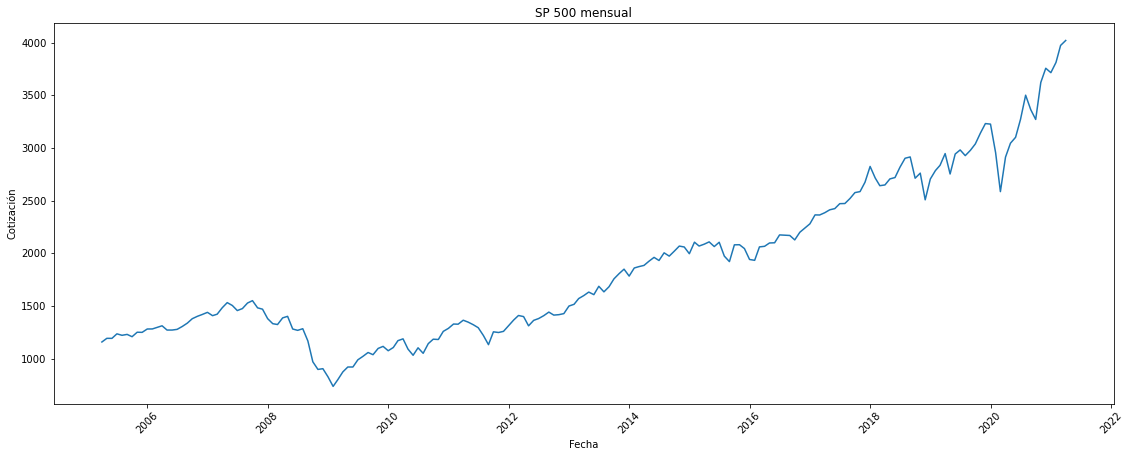

In [9]:
plt.figure(figsize=(19,7))
sns.lineplot(data=df, x='Date', y='Close')
plt.ylabel('Cotización')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title('SP 500 mensual')
plt.show();

In [10]:
df[df['Date']>'2020']

,Date,Close
178,2020-02-01,2954.22
179,2020-03-01,2584.59
180,2020-04-01,2912.43
181,2020-05-01,3044.31
182,2020-06-01,3100.29
183,2020-07-01,3271.12
184,2020-08-01,3500.31
185,2020-09-01,3363.00
186,2020-10-01,3269.96
187,2020-11-01,3621.63


---

In [14]:
# ticker = '^GSPC'
# t = yf.Ticker(ticker)
# temp_df = t.history(period='max')
# temp_df.shape

(18474, 7)

In [15]:
# rnd_nro = str(random.randint(100,999))
# time_code = datetime.today().strftime('%Y%m%d_%H%M')
# file_name = time_code + '_' + ticker + '_' + rnd_nro + '.pkl'
# temp_df.to_pickle(path + file_name)
# file_name

'20230604_1928_^GSPC_406.pkl'

In [11]:
file_name = '20230604_1928_^GSPC_406.pkl'

In [12]:
df = pd.read_pickle(path + file_name)
df.shape

(18474, 7)

In [13]:
df.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-08-27,1652.540039,1652.540039,1629.050049,1630.479980,3219190000,0,0
1966-08-22,0.000000,79.879997,77.580002,78.239998,8690000,0,0
1979-06-20,0.000000,102.190002,100.930000,101.629997,33790000,0,0
2011-10-12,1196.189941,1220.250000,1196.189941,1207.250000,5355360000,0,0
1957-03-08,44.070000,44.070000,44.070000,44.070000,1630000,0,0


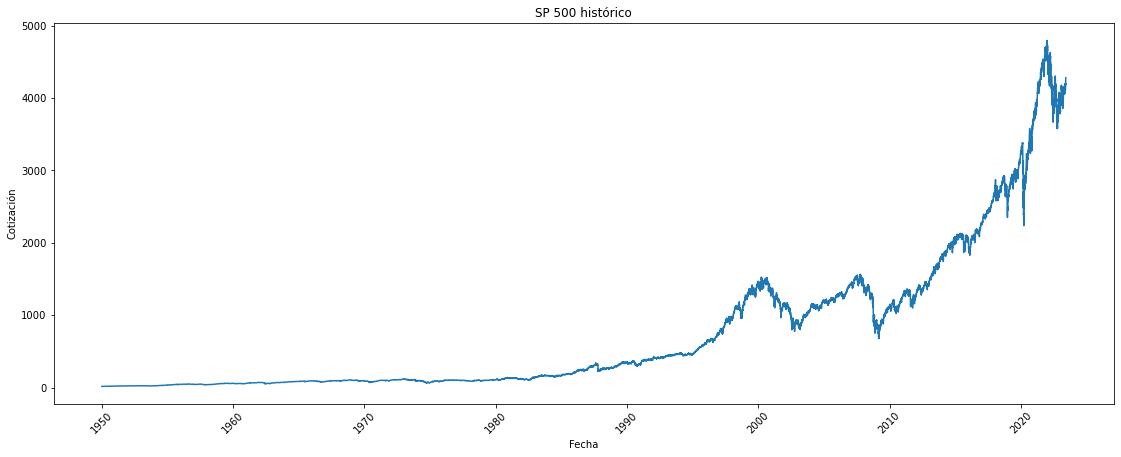

In [14]:
plt.figure(figsize=(19,7))
sns.lineplot(data=df, x='Date', y='Close')
plt.ylabel('Cotización')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title('SP 500 histórico')
plt.show();

## Estadística

In [15]:
fecha_de_corte = '2022-06-01'
sample = df[df.index>=fecha_de_corte]['Close'].copy()
minimo = sample.min()
maximo = sample.max()
rango = maximo - minimo
mediana = sample.median()
media = sample.mean()
desviacion_estandar = sample.std()
un_desv_std_pos = media + desviacion_estandar
un_desv_std_neg = media - desviacion_estandar
percentil_10 = sample.quantile(0.1)
percentil_25 = sample.quantile(0.25)
percentil_75 = sample.quantile(0.75)
percentil_90 = sample.quantile(0.9)
moda = stats.mode(sample, keepdims=True)[0][0]


print('Mínimo:\t\t', round(minimo,2))
print('percentil_10:\t', round(percentil_10, 2))
print('percentil_25:\t', round(percentil_25, 2))
print('Mediana:\t', round(mediana,2))
print('percentil_75:\t', round(percentil_75, 2))
print('percentil_90:\t', round(percentil_90, 2))
print('Máximo:\t\t', round(maximo,2))
print('Rango:\t\t', round(rango,2))
print('')
print('Media:\t\t', round(media,2))
print('Moda:\t\t', round(moda,2))
print('')
print('Desvío Std:\t', round(desviacion_estandar, 2))
print('Desv Std -:\t', round(un_desv_std_neg,2))
print('Desv Std +:\t', round(un_desv_std_pos,2))

whis_outliers = 1.5
iqr = percentil_75 - percentil_25
lower = percentil_25 - whis_outliers * iqr
upper = percentil_75 + whis_outliers * iqr

df_sample = pd.DataFrame(index=sample.index)
df_sample['sample'] = sample
df_sample['IQR_outlier'] = ((sample < lower) | (sample > upper)).astype(int)
outliers_cantidad = (df_sample['IQR_outlier']==1).sum()

mayor_0 = (sample>0).sum()
menor_0 = (sample<0).sum()
igual_0 = (sample==0).sum()
igual_1 = (sample==1).sum()
 
print('\nCantidad de outliers:', outliers_cantidad)
print('Cantidad mayor a 0:', mayor_0)
print('Cantidad menor a 0:', menor_0)
print('Cantidad igual a 0:', igual_0)
print('Cantidad igual a 1:', igual_1)
print('\nValores poco frecuentes: menores a', round(lower, 4), 'o mayores a', round(upper, 4), '\n')

Mínimo:		 3577.03
percentil_10:	 3758.33
percentil_25:	 3855.76
Mediana:	 3981.35
percentil_75:	 4111.08
percentil_90:	 4154.8
Máximo:		 4305.2
Rango:		 728.17

Media:		 3973.62
Moda:		 4137.64

Desvío Std:	 160.44
Desv Std -:	 3813.18
Desv Std +:	 4134.05

Cantidad de outliers: 0
Cantidad mayor a 0: 253
Cantidad menor a 0: 0
Cantidad igual a 0: 0
Cantidad igual a 1: 0

Valores poco frecuentes: menores a 3472.7799 o mayores a 4494.0602 



In [16]:
df_plot = df[df.index>=fecha_de_corte].copy()
df_plot

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4531800000,0,0
2022-06-02,4095.409912,4177.509766,4074.370117,4176.819824,4405790000,0,0
2022-06-03,4137.569824,4142.669922,4098.669922,4108.540039,3711110000,0,0
2022-06-06,4134.720215,4168.779785,4109.180176,4121.430176,4332700000,0,0
2022-06-07,4096.470215,4164.859863,4080.189941,4160.680176,4248210000,0,0
...,...,...,...,...,...,...,...
2023-05-26,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,0,0
2023-05-30,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0,0
2023-05-31,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0,0


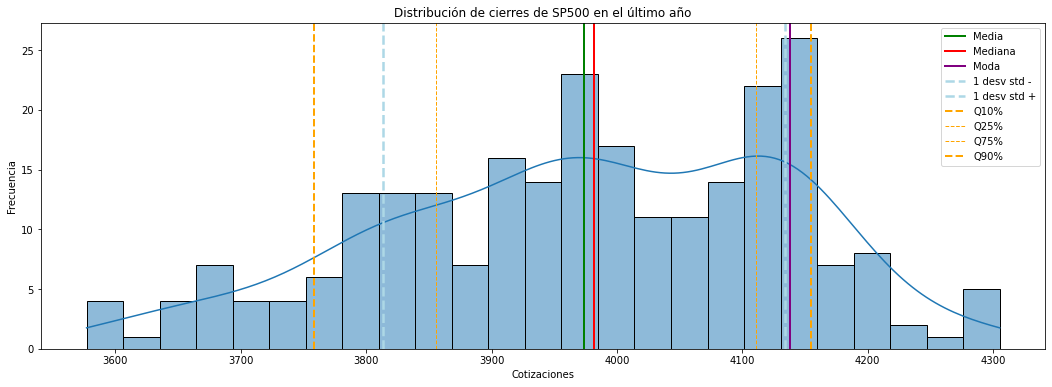

In [17]:
df_plot = df[df.index>='2022-06-01'].copy()
mean = df_plot['Close'].mean()
median = df_plot['Close'].median()

fig, ax = plt.subplots(figsize=(18, 6))
sns.histplot(data=df_plot, x='Close', bins=25, kde=True, ax=ax)
ax.axvline(mean, color='green', linewidth=2, label='Media')
ax.axvline(median, color='red', linewidth=2, label='Mediana')
ax.axvline(moda, color='purple', linewidth=2, label='Moda')
ax.axvline(un_desv_std_neg, color='lightblue', linestyle='--', linewidth=2.5, label='1 desv std -')
ax.axvline(un_desv_std_pos, color='lightblue', linestyle='--', linewidth=2.5, label='1 desv std +')
ax.axvline(percentil_10, color='orange', linestyle='--', linewidth=2, label='Q10%')
ax.axvline(percentil_25, color='orange', linestyle='--', linewidth=1, label='Q25%')
ax.axvline(percentil_75, color='orange', linestyle='--', linewidth=1, label='Q75%')
ax.axvline(percentil_90, color='orange', linestyle='--', linewidth=2, label='Q90%')

ax.set_xlabel('Cotizaciones')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de cierres de SP500 en el último año')
ax.legend()
plt.show()

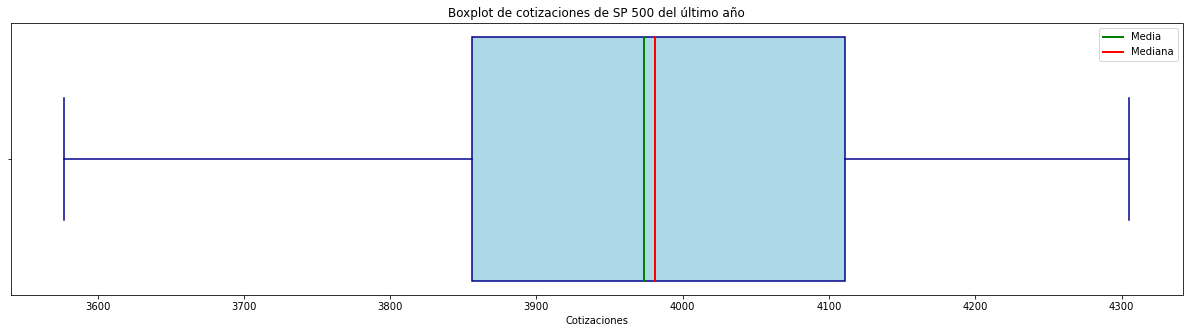

In [18]:
fig, ax = plt.subplots(figsize=(21, 5))
sns.boxplot(x=sample, 
            showmeans=True, 
            meanline=True,
            meanprops={'color': 'green', 'linewidth': 2, 'linestyle': '-'},
            medianprops={'color': 'red', 'linewidth': 2},
            whis=whis_outliers, width=0.9, color='blue',
            boxprops={'edgecolor': 'darkblue', 'facecolor': 'lightblue', 'linewidth': 1.5},
            whiskerprops={'color': 'darkblue', 'linewidth': 1.5},
            capprops={'color': 'darkblue', 'linewidth': 1.5},
            labels=['Muestra'])
ax.set_xlabel('Cotizaciones')
ax.set_title('Boxplot de cotizaciones de SP 500 del último año')

mean_line = plt.Line2D([], [], color='green', linewidth=2, label='Media')
median_line = plt.Line2D([], [], color='red', linewidth=2, label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.show();

## Eliminar datos extremos

In [19]:
percentil_10 = df[df.index>='2022-06-01']['Close'].quantile(0.1)
percentil_90 = df[df.index>='2022-06-01']['Close'].quantile(0.9)
df_central = df[
    (df.index>='2022-06-01') &
    (df['Close'] >= percentil_10) &
    (df['Close'] <= percentil_90)]

df_central.shape

(201, 7)